데이터를 초기의 형태에서 분석하기 용이하게 바꾸는 과정. Data Cleaning이라고도 한다.


In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(file_path, names = headers)

df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Identify and handle missing values

이 데이터셋에서 결손값이 ?로 되어있는 것을 확인할 수 있다. 결손값 처리를 용이하게 하기 위해 ?를 NaN으로 바꿔준다.

In [3]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


데이터별로 결손값이 얼마나 있는지 알아보기 위해 isnull과 반복문을 조합할 수 있다.

In [4]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

# Deal with missing data
1. Drop data<br>
a. Drop the whole row<br>
b. Drop the whole column

2. Replace data<br>
a. replace it by mean<br>
b. replace it by frequency<br>
c. replace it based on other functions<br>

데이터의 타입과 특징에 따라 버리는것과 교체하는 것을 잘 선택해야 한다.<br>
price가 NaN인 경우는 그 행을 전부 다 버린다. price를 예측하는것이 목적이지만 그 값이 없기 때문이다.<br>
nums-of-doors은 four로 치환한다. 대부분이 4이기 때문에 replace it by frequency를 채택한 것이다.<br>
나머지 정보들은 continous한 숫자정보이므로 평균으로 대체한다.

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## Number Replace

In [7]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print(avg_norm_loss)

122.0


In [8]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace = True)

In [9]:
avg_bore = df["bore"].astype("float").mean(axis = 0)
print(avg_bore)

3.3297512437810943


In [10]:
df["bore"].replace(np.nan, avg_bore, inplace = True)

In [11]:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

In [12]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average horsepower: 104.25615763546799


In [13]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

Average peak rpm: 5125.369458128079


## Categorial Replace

In [14]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [15]:
df["num-of-doors"].value_counts().idxmax()

'four'

In [16]:
df["num-of-doors"].replace(np.nan, "four", inplace = True)

## Drop Rows

행 자체를 drop했으므로 reset_index를 이용해서 인덱스를 다시 처리해준다.

In [17]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Correct Data Format
모든 데이터가 데이터 특성에 맞는 타입을 가지도록 해야한다.<br>


In [19]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [20]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [21]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

# Data Normalization, Standardization
데이터 정규화 : feature의 크기가 유의미하게 다른경우 최대/최소값을 사용해 [0,1]사이의 값으로 스케일링 하는 방법. (MixMaxScaler, Normalizer)
<br>
표준화: 특정범위로 제한하지 않고 평균과 표준편차를 통한 정규분포 형태로 만드는 방법. 이상치를 제거하는데 용이하다.

<br>
표준화를 통해 이상치를 제거하고, 그 다음 데이터를 정규화해 상대적 크기에 대한 영향력을 줄인 다음 분석하는 것이 가장 좋다.


In [23]:
df["highway-mpg"] = 235/df["highway-mpg"] # mile -> kilometer
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

In [24]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27.0,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26.0,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30.0,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22.0,17450.0


In [25]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

# Binning
Binning은 연속적인(숫자) 데이터를 group analysis를 위해 이산적인 분류로 나누어 주는 것 이다.<br>
이 예제에서는 차의 마력을 high, medium, little로 나누어 bin을 만들 것 이다.


In [26]:
df["horsepower"] = df["horsepower"].astype("int", copy=True)

Text(0, 0.5, 'count')

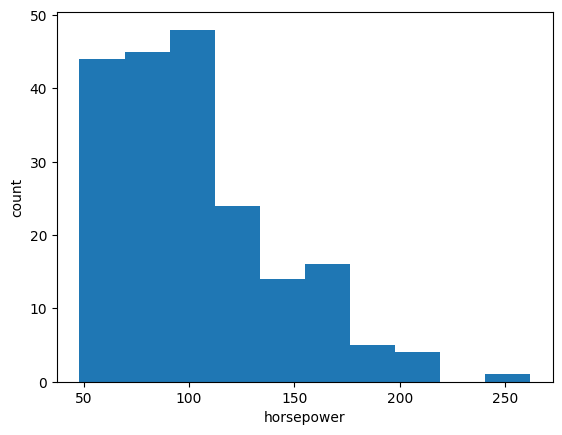

In [27]:
import matplotlib.pyplot as plt
plt.hist(df["horsepower"])

plt.xlabel("horsepower")
plt.ylabel("count")

마력의 최솟값과 최대값을 이용해 사분위수로 나눠 3개의 카테고리를 가지게 한다.

In [28]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [29]:
group_names = ['Low', 'Medium', 'High']

In [30]:
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [32]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

<BarContainer object of 3 artists>

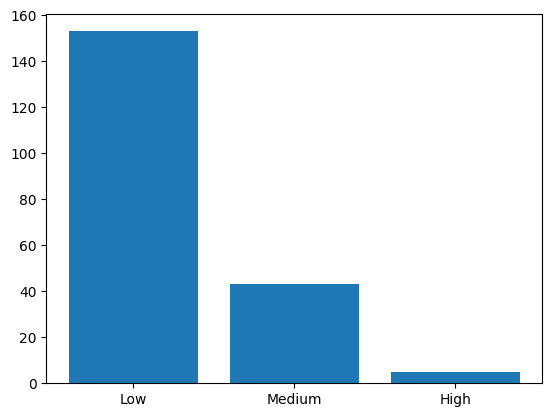

In [34]:
plt.bar(group_names, df["horsepower-binned"].value_counts())

(array([153.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <BarContainer object of 3 artists>)

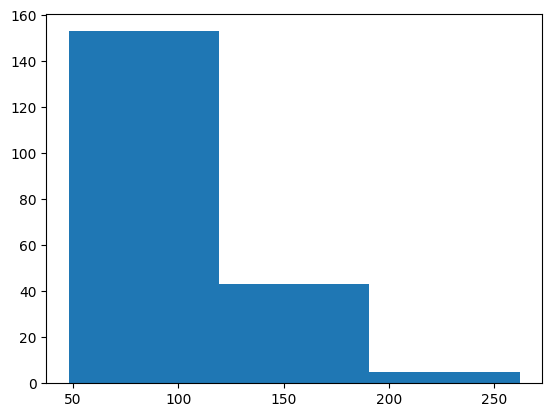

In [36]:
plt.hist(df["horsepower"], bins = 3)

# Indicator Variables (one-hot encoding)
범주형 데이터에 해당하면 1, 아니면 0을 가지는 dummy를 만들어 회귀분석에 사용할 수 있도록 함.

In [37]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [39]:
dummy_variable_1.rename(columns={'gas': 'fuel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [40]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis = 1, inplace = True)

In [41]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27.0,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,21,27.0,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,19,26.0,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,24,30.0,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,18,22.0,17450.0,Low,0,1
